### Generating Barabási-Albert Networks
#### With the help of a computer, generate a network with N = 10^4 nodes using the Barabási-Albert model with m = 4. Use as initial condition a fully connected network with m = 4 nodes.

In [21]:
import networkx as nx
from networkx import Graph
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def generate_network(N: int, m: int) -> Graph:
    inital_graph = nx.complete_graph(m)
    return nx.barabasi_albert_graph(N, m, seed=None, initial_graph=inital_graph)

def measure_degree_distribution(G: Graph) -> None:
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    
    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)
    
    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Connected components of G")
    ax0.set_axis_off()

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

In [23]:
N = 10000
m = 4

G = generate_network(N, m)

Measure the degree distribution at intermediate steps, namely when the network has 10^2, 10^3 and 10^4 nodes.

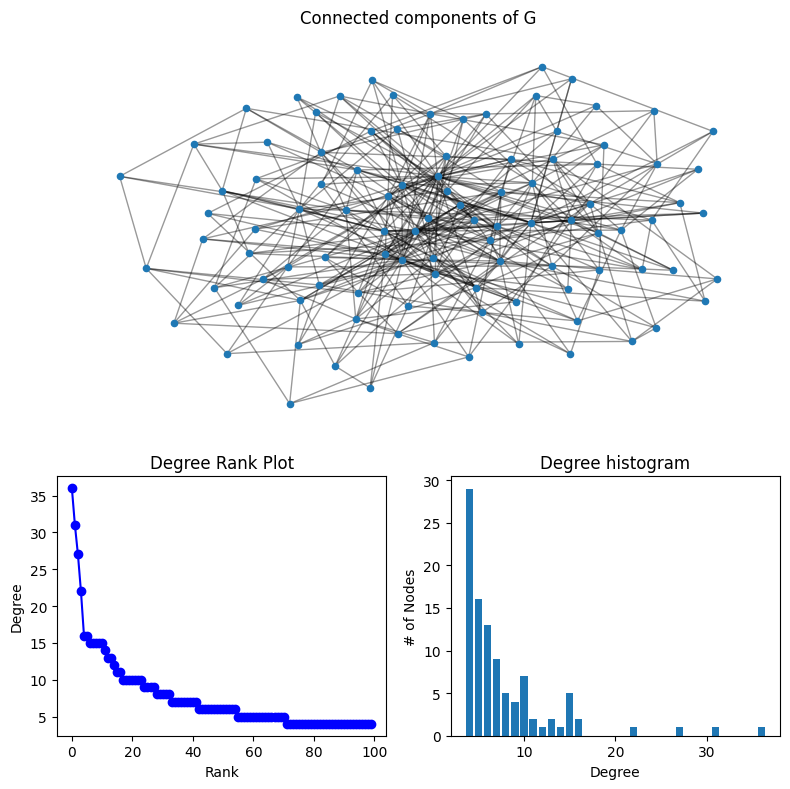

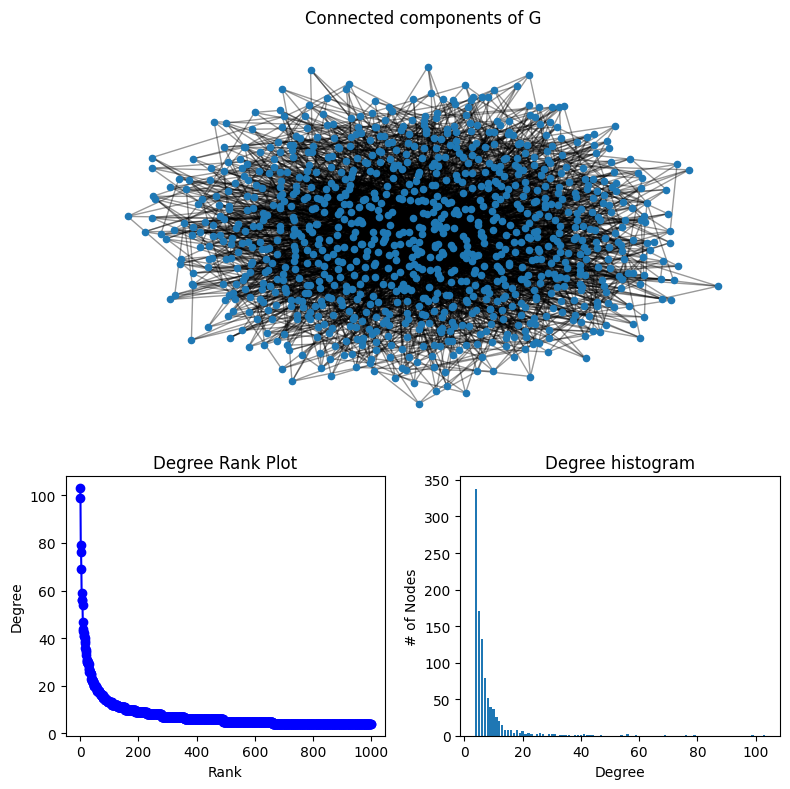

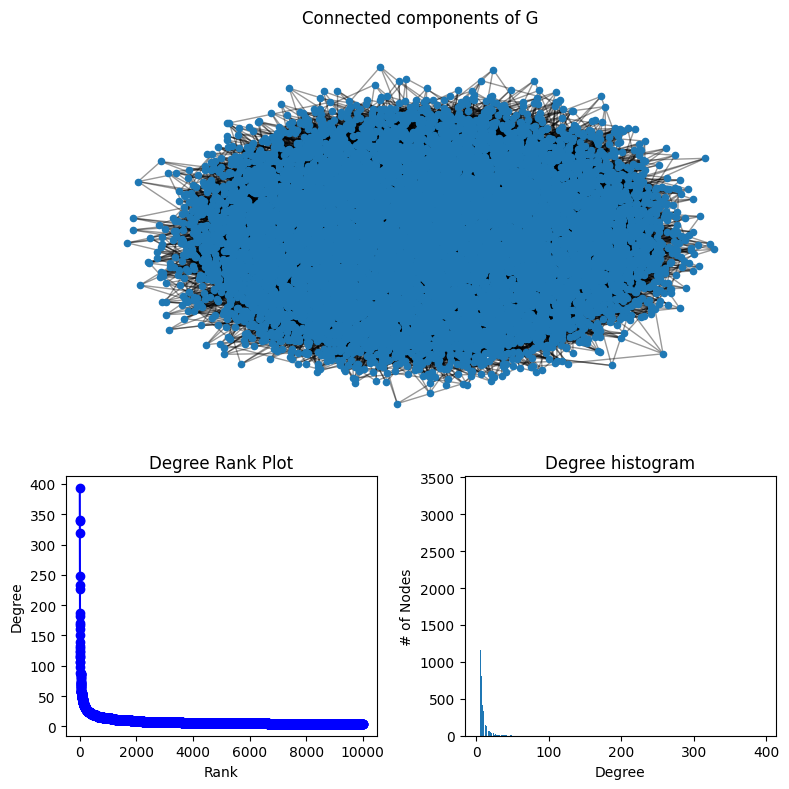

In [24]:
N_list = [100, 1000, 10000]
for N in N_list:
    print(f"{N} nodes:")
    G = generate_network(N, m)
    measure_degree_distribution(G)

Compare the distributions at these intermediate steps by plotting them together and fitting each to a power-law with degree exponent γ. Do the distributions "converge"?

In [25]:
#N_list = [100, 1000, 10000]
#for N in N_list:
#    G = generate_network(N, m)
#    x, y = zip(*list(G.degree(G.nodes)))
#    plt.scatter(x, y, alpha=0.5)

Plot together the cumulative degree distributions at intermediate steps.

Measure the average clustering coefficient in function of N.

Following Image 5.6a, measure the degree dynamics of one of the initial nodes and of the nodes added to the network at time t = 100, t = 1,000 and t = 5,000.